In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [2]:
df1 = pd.read_csv("sample1.csv", index_col="Date")
df2 = pd.read_csv("sample2.csv", index_col="Date")

In [3]:
df1

,Unnamed: 0,Rating,Username,Review,University,City
Date,,,,,,
2024-10-13,0,3.8,10119396,Aberdeen is one of the best universities in th...,University Of Aberdeen,Aberdeen
2024-10-13,1,4.2,6119373,"I like the University or Aberdeen, it's a nice...",University Of Aberdeen,Aberdeen
2024-10-13,2,3.6,7119310,It’s perfect one year experience but might be ...,University Of Aberdeen,Aberdeen
2024-10-11,3,5.0,8119100,amazing place love everything here,University Of Aberdeen,Aberdeen
2024-10-11,4,5.0,7119099,The apartment is better than expected! The loc...,University Of Aberdeen,Aberdeen
...,...,...,...,...,...,...
2015-04-30,38757,3.5,108705,Not the best university... But probably not th...,York St John University,York
2015-04-30,38758,3.5,68597,"An amazing, welcoming and friendly university!...",York St John University,York
2015-04-30,38759,4.0,128579,su is too small and the gym is rubbish,York St John University,York


In [4]:
df2

,Unnamed: 0,University,Course Name,Rating,Review
Date,,,,,
2024-10-16,0,University of Aberdeen,Psychology MA (Hons),4.0,The university campus does offer a vast range ...
2024-10-15,1,The University of Edinburgh,Archaeology and Social Anthropology MA (Hons),4.0,Amazing funding and facilities for my course b...
2024-10-10,2,Birmingham Newman University,Primary Education (3-11) with QTS BA (Hons),5.0,Newman has phenomenal lecturers who have at le...
2024-10-10,3,University of Exeter,MSc Advanced Clinical Practice,5.0,"Nice location and environment, with supportive..."
2024-10-10,4,University of Exeter,Computer Science and Mathematics BSc (Hons),5.0,There's so many activities and oppurtunities a...
...,...,...,...,...,...
2013-09-09,165432,Anglia Ruskin University,undefined,1.0,Bad Choice for PGCE!The level of student satis...
2013-09-08,165433,"Queen Margaret University, Edinburgh",undefined,2.0,"Someone, somewhere, someday said ""Here's a fie..."
2013-05-28,165434,University of Winchester,undefined,4.0,"My Course (Politics) was fantastic, I had such..."


In [5]:
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'Rating', 'Username', 'Review', 'University', 'City'], dtype='object')
Index(['Unnamed: 0', 'University', 'Course Name', 'Rating', 'Review'], dtype='object')


In [6]:
df = pd.merge(df1, df2, on=['University', 'Rating', 'Review', 'Date'], how='outer')

In [7]:
df = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [8]:
df['Username'] = df['Username'].fillna("undefined")
df['Course Name'] =df['Course Name'].fillna("undefined")

In [9]:
df['City'] = df['City'].replace({
    'College Of Surgeons In Ireland Dublin': 'Dublin',
    'University Dublin': 'Dublin',
    'College Dublin': 'Dublin',
    'University Dublin Dublin': 'Dublin',
    'City University Dublin' : 'Dublin',
    'University Plymouth Plymouth' : 'Plymouth',
    'University Maynooth' : 'Maynooth',
    'College Dublin Dublin' : 'Dublin',
    'Newman University Birmingham': 'Birmingham'
    
})

In [10]:
df['City'] = df['City'].fillna('undefined')

In [11]:
known_cities = df['City'].unique()

In [12]:
def update_city(uni_name, current_city):
    if current_city == 'undefined' and isinstance(uni_name, str):
        for city in known_cities:
            if city.lower() in uni_name.lower():
                return city
    return current_city  # Return the current city if it's not undefined or no match found

# Apply the function to update the City column
df['City'] = df.apply(lambda row: update_city(row['University'], row['City']), axis=1)

In [13]:
undefined_cities = df[df['City'] == 'undefined']

In [14]:
df['University'] = df['University'].str.strip()
df['City'] = df['City'].str.strip()
undefined_cities['University'].unique()

array(['University of Sussex', 'University of Central Lancashire',
       'University of Suffolk', 'London Metropolitan University',
       'Kingston University', 'The University of Law',
       'University for the Creative Arts',
       'London Interdisciplinary School (LIS)',
       'SOAS University of London', 'Queen Mary University of London',
       'University of Roehampton', 'University of Westminster, London',
       'University Academy 92 (UA92)', 'University of Staffordshire',
       'University of Hertfordshire', 'University of East Anglia UEA',
       'University of Surrey', 'University of South Wales',
       'London School of Economics and Political Science, University of London',
       'University of Kent', 'The Northern School of Art',
       "King's College London, University of London",
       'Central Film School London', 'University Centre Peterborough',
       'Arden University', 'Goldsmiths, University of London',
       'De Montfort University', 'ThinkSpace Educ

In [15]:
university_city_mapping = {
    'University of Sussex': 'Brighton',
    'University of Central Lancashire': 'Preston',
    'University of Suffolk': 'Ipswich',
    'London Metropolitan University': 'London',
    'Kingston University': 'Kingston',
    'The University of Law': 'London',
    'University for the Creative Arts': 'Farnham',  # Multiple campuses, but Farnham is a primary location
    'London Interdisciplinary School (LIS)': 'London',
    'SOAS University of London': 'London',
    'Queen Mary University of London': 'London',
    'University of Roehampton': 'London',
    'University of Westminster, London': 'London',
    'University Academy 92 (UA92)': 'Manchester',
    'University of Staffordshire': 'Stafford',
    'University of Hertfordshire': 'Hatfield',
    'University of East Anglia UEA': 'Norwich',
    'University of Surrey': 'Guildford',
    'University of South Wales': 'Treforest',
    'London School of Economics and Political Science, University of London': 'London',
    'University of Kent': 'Canterbury',
    'The Northern School of Art': 'Hartlepool',
    "King's College London, University of London": 'London',
    'Central Film School London': 'London',
    'University Centre Peterborough': 'Peterborough',
    'Arden University': 'Birmingham',
    'Goldsmiths, University of London': 'London',
    'De Montfort University': 'Leicester',
    'ThinkSpace Education': 'London',
    'Birkbeck, University of London': 'London',
    'Ulster University': 'Belfast',
    'London South Bank University': 'London',
    'Hereford College of Arts': 'Hereford',
    'BIMM University': 'Birmingham',
    'Anglia Ruskin University': 'Cambridge',
    'University of Essex International College': 'Colchester',
    'Rose Bruford College': 'London',
    'University of Warwick': 'Coventry',
    'Abertay University': 'Dundee',
    'Heriot-Watt University': 'Edinburgh',
    'Royal Holloway, University of London': 'Egham',
    'Bishop Grosseteste University': 'Lincoln',
    'University of the Arts London': 'London',
    'London College of Contemporary Arts': 'London',
    'Northumbria University, Newcastle': 'Newcastle upon Tyne',
    'University of Wales Trinity Saint David': 'Swansea',
    "St George's, University of London": 'London',
    "St Mary's University, Twickenham": 'Twickenham',
    'Healthcare Learning': 'London',  # Assuming online or London-based
    'Edge Hill University': 'Ormskirk',
    'Hartpury University': 'Hartpury',
    'Harper Adams University': 'Edgmond',
    'The Engineering & Design Institute London': 'London',
    'Teesside University': 'Middlesbrough',
    'Teesside University International Study Centre': 'Middlesbrough',
    'University of Essex': 'Colchester',
    'dBs Institute': 'Bristol',
    'Kingston College': 'Kingston',
    'University of Greenwich': 'Greenwich',
    'University of London Institute in Paris': 'Paris',
    'Royal Agricultural University': 'Cirencester',
    'European College of Business and Management': 'London',
    'De Montfort University International College': 'Leicester',
    'pointblank Music School': 'London',
    'Mountview Academy Of Theatre Arts': 'London',
    'London School of Commerce': 'London',
    'Northumbria University London Campus': 'London',
    'Futureworks': 'Manchester',
    'Staffordshire University London': 'London',
    'St. George’s University': 'London',  # Assuming it's in London
    'University of Strathclyde': 'Glasgow',
    'Kaplan UK': 'London',  # Various locations
    'University Campus Oldham': 'Oldham',
    'UCL (University College London)': 'London',
    'University of Greenwich International College': 'Greenwich',
    'Nazarene Theological College': 'Manchester',
    'West Herts College': 'Watford',
    'Hertfordshire International College': 'Hatfield',
    'Brunel University London': 'Uxbridge',
    'Newcastle University': 'Newcastle upon Tyne',
    'Imperial College London': 'London',
    'The University of Law Business School': 'London',
    'Screen and Film School': 'Birmingham',
    'Interactive Design Institute': 'Edinburgh',
    'Medway School of Pharmacy': 'Chatham',
    'Herefordshire and Ludlow College': 'Hereford',
    'City, University of London': 'London',
    'Harrow, Richmond & Uxbridge College': 'Harrow',
    'Kingston University International Study Centre': 'Kingston',
    'University of Cumbria': 'Carlisle',
    'Queen Mary University of London Online': 'London',
    'University of Surrey International Study Centre': 'Guildford',
    'ONCAMPUS UK North': 'Newcastle upon Tyne',
    'MetFilm': 'London',
    'London School of Business and Finance': 'London',
    'ESCP Business School': 'London',
    'INTO Newcastle University': 'Newcastle upon Tyne',
    'Royal College of Art': 'London',
    'Coleg Sir Gar': 'Carmarthen',
    'City and Islington College': 'London',
    'Bloomsbury Institute London': 'London',
    'Fife College': 'Kirkcaldy',
    'Kent and Medway Medical School': 'Chatham',
    'Architectural Association School Of Architecture': 'London',
    'University of the West of Scotland': 'Paisley',
    'Burnley College': 'Burnley',
    'University of Central Lancashire Online': 'Preston',
    'BCOM & ESO - part of BCNO Group (London & Kent)': 'London',
    'University Centre Sparsholt': 'Sparsholt',
    'Middlesex University': 'London',
    'ONCAMPUS Aston': 'Aston',
    'Plumpton College': 'Plumpton',
    'Dyson Institute of Engineering and Technology': 'Swindon',
    'College of Agriculture, Food and Rural Enterprise': 'Cookstown',
    'De Broc Business School Online': 'London',
    'Open University': 'Milton Keynes',
    'Royal Central School of Speech and Drama, University of London': 'London',
    'Aston University Online': 'Birmingham',
    'Brunel University London Pathway College': 'Uxbridge',
    'Norland': 'London',
    'Harrogate College': 'Harrogate',
    'Northeastern University London': 'London',
    'Robert Gordon University': 'Aberdeen',
    'Newquay University Centre Cornwall College': 'Newquay',
    'University of Strathclyde International Study Centre': 'Glasgow',
    'Cornwall College': 'St Austell',
    'Universal Centre of Sport': 'London',
    'Stranmillis University College': 'Belfast',
    'Middlesex University, London (QA Higher Education)': 'London',
    'Hult International Business School': 'London',
    'Warwickshire College and University Centre': 'Warwick',
    'Walsall College': 'Walsall',
    'Petroc': 'Barnstaple',
    'Institute of Contemporary Music Performance': 'London',
    'ACM (The Academy of Contemporary Music)': 'Guildford',
    'Coleg Cambria': 'Wrexham',
    'Blackpool and the Fylde College': 'Blackpool',
    'Open College of the Arts': 'Barnsley',
    'LIBF': 'London',
    'University Centre South Essex': 'Southend-on-Sea',
    'London Metropolitan University - QA Higher Education': 'London',
    'University of Essex Online': 'Colchester',
    'London School of Hygiene & Tropical Medicine, University of London': 'London',
    'North Hertfordshire College': 'Hitchin',
    'Cranfield University': 'Cranfield',
    'CU London': 'Greenwich',
    'Oaklands College': 'St Albans',
    'CU Scarborough': 'Scarborough',
    'UCFB': 'Manchester',
    'Courtauld Institute of Art, University of London': 'London',
    'Health Sciences University (formerly AECC University College)': 'Bournemouth',
    'Royal Veterinary College, University of London': 'London',
    'Condé Nast College of Fashion & Design': 'London',
    'University of St Andrews': 'St Andrews',
    'University Centre Bishop Burton': 'Bishop Burton',
    'Coleg Gwent': 'Newport',
    'SAE Institute': 'London',
    'Ravensbourne University London': 'London',
    'Royal College of Music': 'London',
    'Amity University [IN] London': 'London',
    'London School of Management Education': 'London',
    'Regent College London': 'London',
    'Conservatoire for Dance and Drama': 'London',
    'The London Institute of Banking & Finance': 'London',
    'University of Lincoln': 'Lincoln',
    'LJMU': 'Liverpool',
    'Falmouth University': 'Falmouth',
    'University of Brighton': 'Brighton',
    'University of Westminster': 'London',
    'University of Leeds': 'Leeds',
    'Loughborough University': 'Loughborough',
    'University of Southampton': 'Southampton',
    'University of Bristol': 'Bristol',
    'University of Liverpool': 'Liverpool',
    'University of Nottingham': 'Nottingham',
    'University of Oxford': 'Oxford',
    'University of Cambridge': 'Cambridge',
    'University of Manchester': 'Manchester',
    'University of Edinburgh': 'Edinburgh',
    'Kingston College': 'Kingston',
    'University of the West of England': 'Bristol',
    'Teesside University': 'Middlesbrough',
    'Durham University': 'Durham',
    'University of Stirling': 'Stirling',
    'University of Dundee': 'Dundee',
    'University of Aberystwyth': 'Aberystwyth',
    'Cardiff University': 'Cardiff',
    'University of Wales': 'Cardiff',
    'Loughborough College': 'Loughborough',
    'University of Glasgow': 'Glasgow',
    'City College Norwich': 'Norwich',
    'University of Aberdeen': 'Aberdeen',
    'University of Bath': 'Bath',
    'University of Sussex': 'Brighton',
    'University of Wolverhampton': 'Wolverhampton',
    'University of Chichester': 'Chichester',
    'University of Central Lancashire': 'Preston',
    'University of Birmingham': 'Birmingham',
    'Edge Hill University': 'Ormskirk',
    'Northampton University': 'Northampton',
    'University of Kingston': 'Kingston',
    'University of Sunderland': 'Sunderland',
    'University of Plymouth': 'Plymouth',
    'University of Chester': 'Chester',
    'University of Bedfordshire': 'Luton',
    'University of Huddersfield': 'Huddersfield',
    'Nottingham Trent University': 'Nottingham',
    'University of West London': 'London',
    'Bishop Grosseteste University': 'Lincoln',
    'Southampton Solent University': 'Southampton',
    'London School of Economics': 'London',
    'University of Salford': 'Salford',
    'University of South Wales': 'Treforest',
}

for university, city in university_city_mapping.items():
    df.loc[df['University'] == university, 'City'] = city


In [16]:
df['City'].value_counts()

City
London        15058
Birmingham     8510
Leeds          7414
Glasgow        7162
Nottingham     6445
              ...  
Newquay           1
Harrogate         1
Oldham            1
Newport           1
Aston             1
Name: count, Length: 127, dtype: int64

# ANALYSIS

In [17]:
print(df['Rating'].describe())

count    204196.000000
mean          4.197718
std           0.836078
min           1.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64


In [18]:
df['City'].unique()

array(['Aberdeen', 'Dundee', 'Aberystwyth', 'Cambridge', 'Bournemouth',
       'Plymouth', 'Birmingham', 'Bangor', 'Bath', 'Luton',
       'Central London', 'Lincoln', 'Bolton', 'Bradford', 'Brighton',
       'Bristol', 'Uxbridge', 'Buckingham', 'High_Wycombe', 'Canterbury',
       'Cardiff', 'Preston', 'Chester', 'Chichester', 'East London',
       'Colchester', 'Coventry', 'Carlisle', 'Leicester', 'Derby',
       'Dublin', 'Durham', 'Norwich', 'Ormskirk', 'Edinburgh', 'Exeter',
       'Falmouth', 'Glasgow', 'Cheltenham', 'South East London',
       'Edgmond', 'Gloucester', 'Hatfield_Hertfordshire', 'Huddersfield',
       'Hull', 'London', 'Keele', 'Kingston', 'Lancaster', 'Guildford',
       'Leeds', 'Liverpool', 'Loughborough', 'Manchester', 'Maynooth',
       'Newcastle upon Tyne', 'Northampton', 'Newcastle_Upon_Tyne',
       'Nottingham', 'Oxford', 'Portsmouth', 'Belfast', 'Reading',
       'North London', 'West London', 'South West London', 'Cirencester',
       'Salford', 'Sheff

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204196 entries, 2024-10-13 to 2007-03-20
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rating       204196 non-null  float64
 1   Username     204196 non-null  object 
 2   Review       204196 non-null  object 
 3   University   204196 non-null  object 
 4   City         204196 non-null  object 
 5   Course Name  204196 non-null  object 
dtypes: float64(1), object(5)
memory usage: 10.9+ MB


In [20]:
# 2. Textual Analysis for Areas of Improvement
# Convert reviews to lowercase for uniformity
df['Review'] = df['Review'].str.lower()

# Word Frequency Analysis for Positive and Negative Reviews
positive_reviews = df[df['Rating'] >= 4]['Review']
negative_reviews = df[df['Rating'] <= 2]['Review']

# Define a function to extract frequent words
def frequent_words(reviews, num_words=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=num_words)
    X = vectorizer.fit_transform(reviews)
    return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

print("Common Words in Positive Reviews:\n", frequent_words(positive_reviews))
print("\nCommon Words in Negative Reviews:\n", frequent_words(negative_reviews))

Common Words in Positive Reviews:
 university    60558
great         50307
good          48431
students      32466
student       31626
campus        30895
really        29389
uni           28947
facilities    26969
support       25735
course        24482
experience    23676
best          19596
study         17881
staff         16713
people        16070
amazing       16021
like          15932
life          15474
time          15193
dtype: int64

Common Words in Negative Reviews:
 university    3868
students      2903
course        2307
student       1773
uni           1686
support       1528
year          1526
good          1524
time          1323
don           1290
like          1250
experience    1173
just          1098
campus        1054
lecturers     1029
staff          984
people         956
really         936
money          920
work           875
dtype: int64


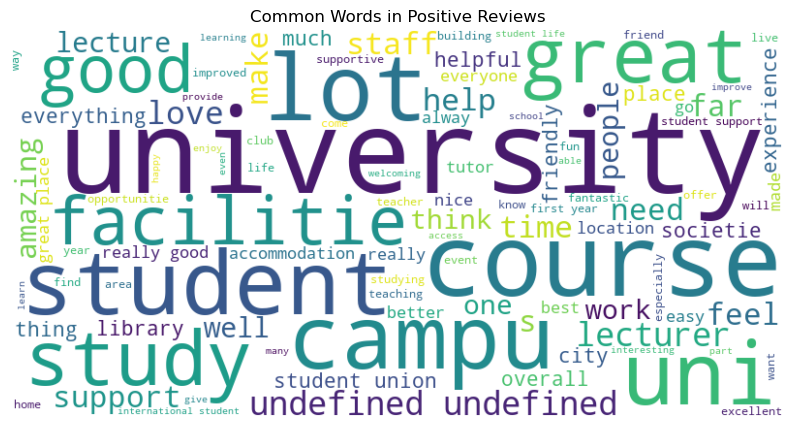

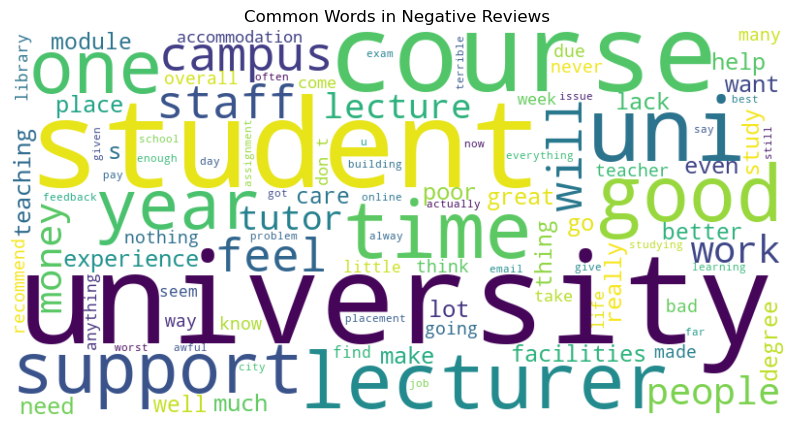

In [21]:
# Generate WordClouds for Positive and Negative Reviews
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

# WordCloud for Positive Reviews
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Common Words in Positive Reviews")
plt.axis("off")
plt.show()

# WordCloud for Negative Reviews
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Common Words in Negative Reviews")
plt.axis("off")
plt.show()

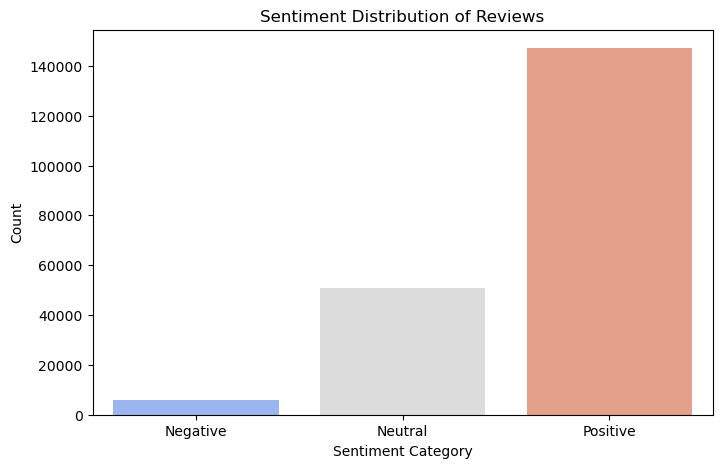

In [22]:
df['Sentiment'] = df['Review'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Categorize Sentiments
df['Sentiment_Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment_Category', palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

In [23]:
university_insights = df.groupby('University').agg(
    avg_rating=('Rating', 'mean'),
    positive_reviews=('Sentiment_Category', lambda x: (x == 'Positive').sum()),
    negative_reviews=('Sentiment_Category', lambda x: (x == 'Negative').sum())
).sort_values(by='avg_rating', ascending=True)

print("Universities with Potential Areas of Improvement (lowest avg ratings):\n", university_insights.head())


Universities with Potential Areas of Improvement (lowest avg ratings):
                                      avg_rating  positive_reviews  \
University                                                          
Gateshead College                           1.0                 0   
United Colleges Group                       1.0                 0   
Newham College of Further Education         1.0                 0   
Bicton College                              1.0                 0   
Conservatoire For Dance And Drama           1.0                 0   

                                     negative_reviews  
University                                             
Gateshead College                                   0  
United Colleges Group                               1  
Newham College of Further Education                 0  
Bicton College                                      0  
Conservatoire For Dance And Drama                   0  


In [24]:
university_insights[:10]

,avg_rating,positive_reviews,negative_reviews
University,,,
Gateshead College,1.0,0,0
United Colleges Group,1.0,0,1
Newham College of Further Education,1.0,0,0
Bicton College,1.0,0,0
Conservatoire For Dance And Drama,1.0,0,0
City of Liverpool College University Centre,1.0,0,0
London School of Planning and Management,1.0,1,0
New City College (incorporating Havering College),1.0,0,1
Lancaster & Morecambe College,1.0,0,0


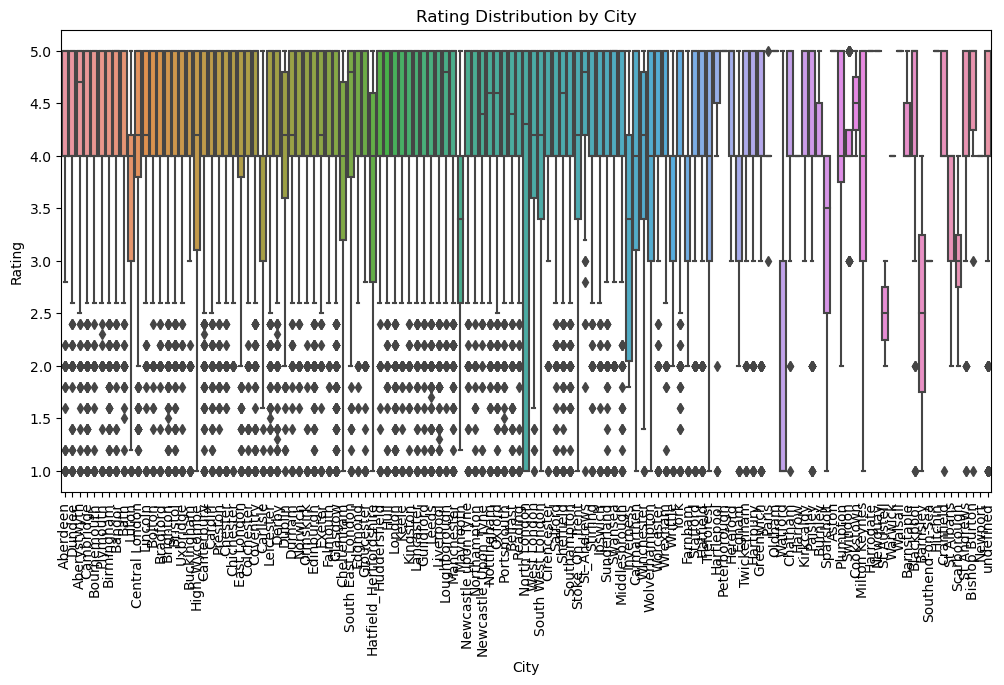

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City', y='Rating')
plt.xticks(rotation=90)
plt.title("Rating Distribution by City")
plt.xlabel("City")
plt.ylabel("Rating")
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_frequent_terms(reviews, top_n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    try:
        X = vectorizer.fit_transform(reviews)
        if X.shape[1] == 0:  # No terms after filtering
            return pd.Series(dtype='float64')
        term_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum()
        return term_counts.sort_values(ascending=False)
    except ValueError:  # Catch empty vocabulary error
        return pd.Series(dtype='float64')

# Dictionary to hold strengths and weaknesses
uni_strengths_weaknesses = {}

# Group data by university
for university, uni_data in df.groupby('University'):
    if uni_data['Review'].dropna().empty:  # Skip if no reviews
        continue
    
    positive_reviews = uni_data[uni_data['Rating'] >= 4]['Review'].dropna().tolist()
    negative_reviews = uni_data[uni_data['Rating'] <= 2]['Review'].dropna().tolist()

    # Get frequent terms in positive and negative reviews
    strengths = get_frequent_terms(positive_reviews, top_n=10)
    weaknesses = get_frequent_terms(negative_reviews, top_n=10)
    
    # Store only if strengths or weaknesses exist
    if not strengths.empty or not weaknesses.empty:
        uni_strengths_weaknesses[university] = {
            'Strengths': strengths.index.tolist(),
            'Weaknesses': weaknesses.index.tolist()
        }

# Display the results
uni_strengths_weaknesses


{'ACM (The Academy of Contemporary Music)': {'Strengths': ['acm',
   'music',
   'industry',
   'experience',
   'facilities',
   'tutors',
   'place',
   'time',
   'year',
   'iâ'],
  'Weaknesses': ['students',
   'learning',
   'money',
   'university',
   'acm',
   'course',
   'term',
   'time',
   'hardware',
   'pounds']},
 'ARU London': {'Strengths': ['experience', 'wonderful'], 'Weaknesses': []},
 'ARU Writtle (formerly Writtle University College)': {'Strengths': ['good',
   'really',
   'writtle',
   'great',
   'lecturers',
   'course',
   'campus',
   'life',
   'college',
   'uni'],
  'Weaknesses': ['university',
   'students',
   'writtle',
   'course',
   'avoid',
   'campus',
   'just',
   'like',
   'student',
   'lack']},
 'Abertay University': {'Strengths': ['university',
   'great',
   'students',
   'good',
   'abertay',
   'student',
   'course',
   'staff',
   'lecturers',
   'facilities'],
  'Weaknesses': ['students',
   'student',
   'abertay',
   'university',

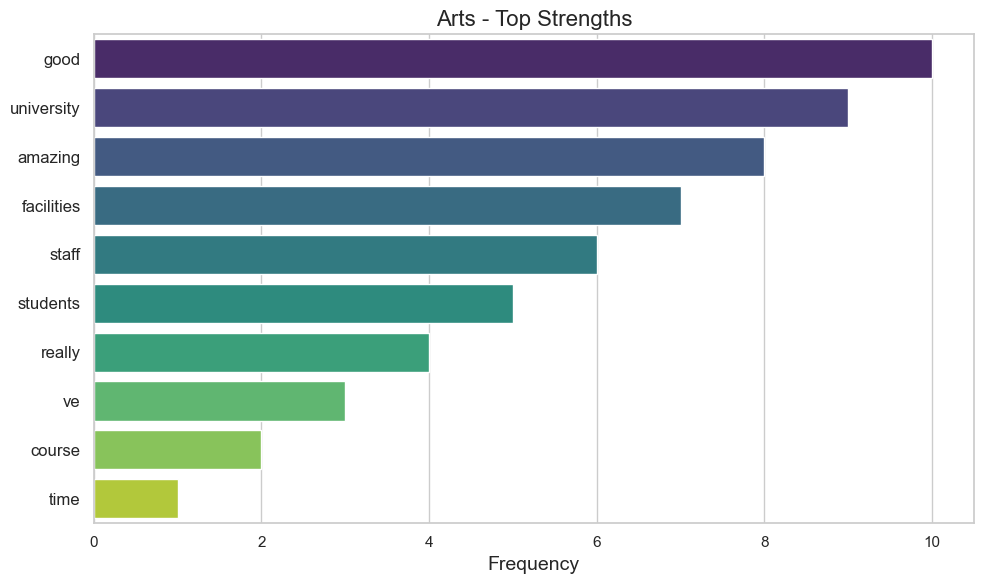

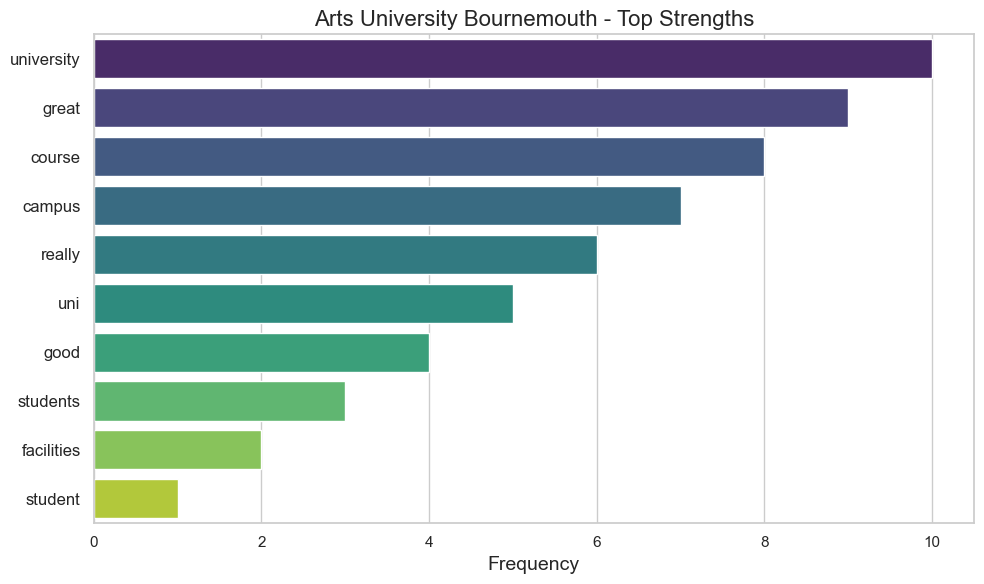

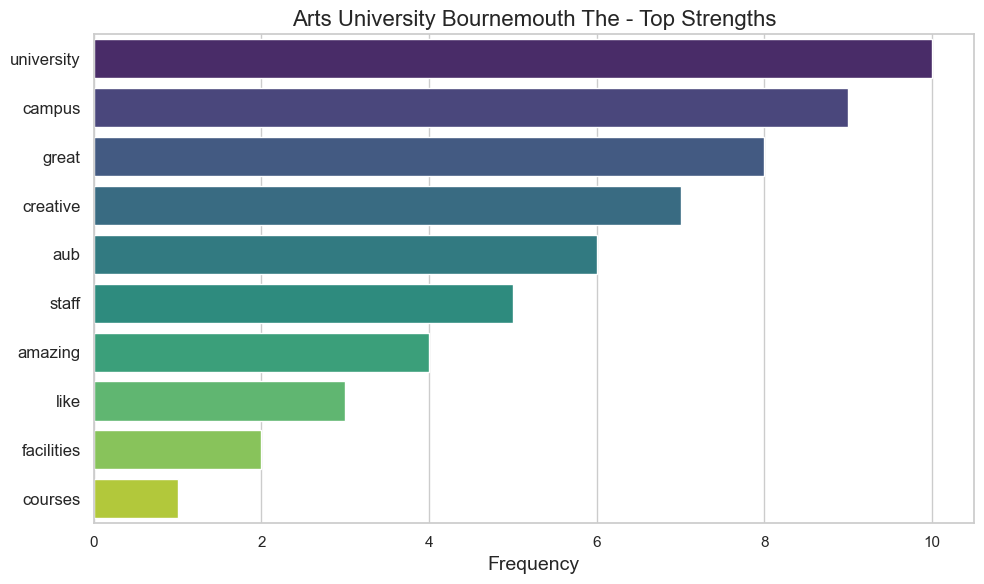

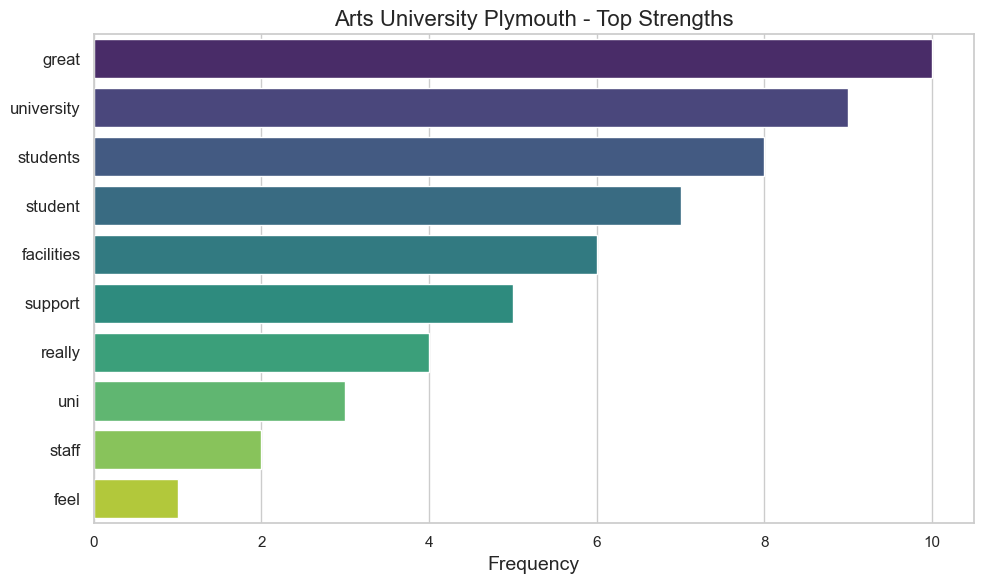

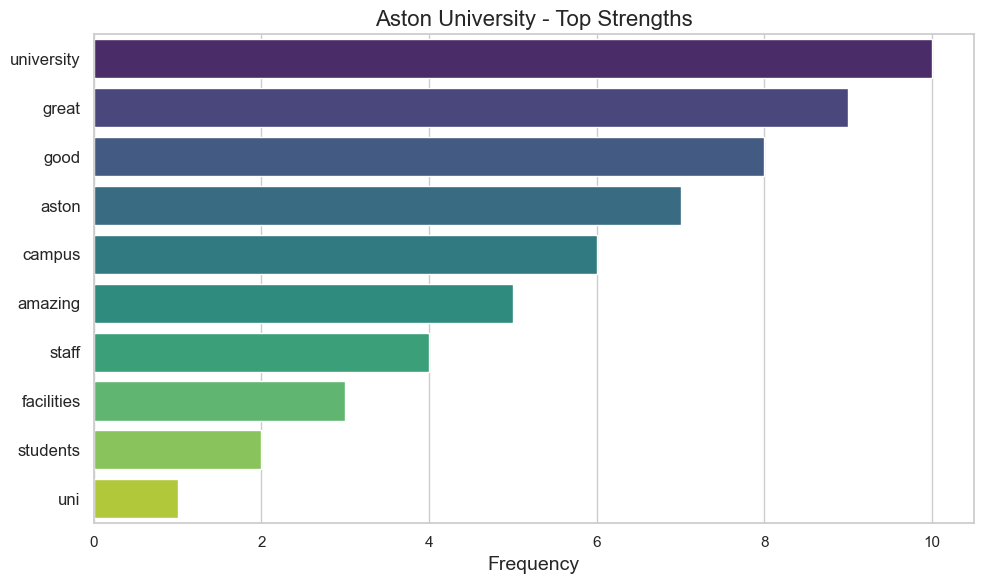

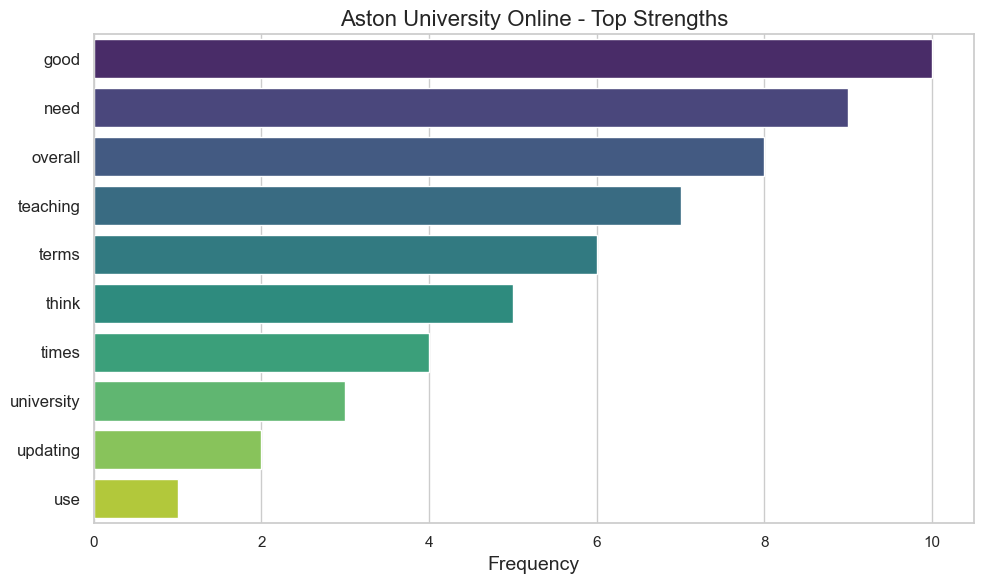

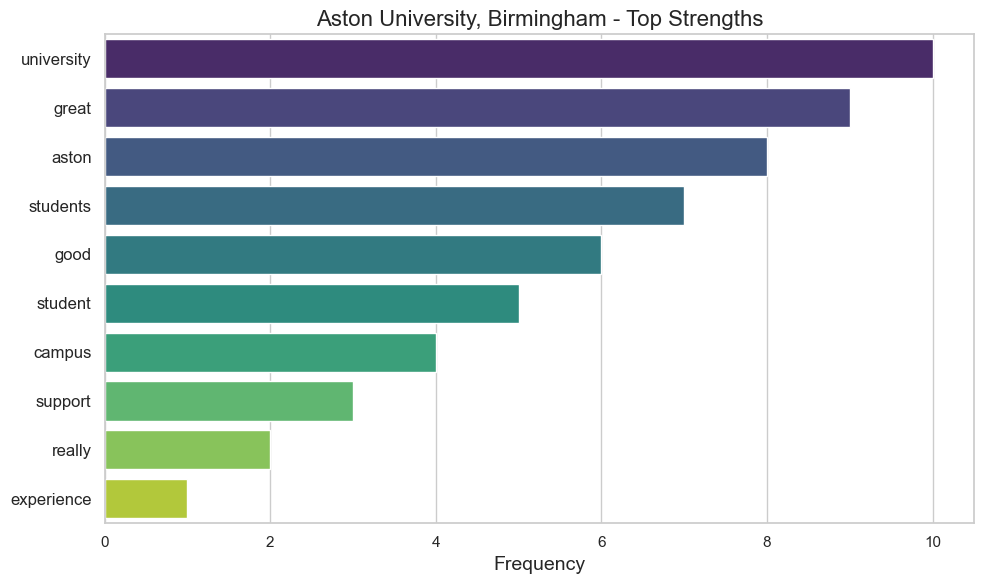

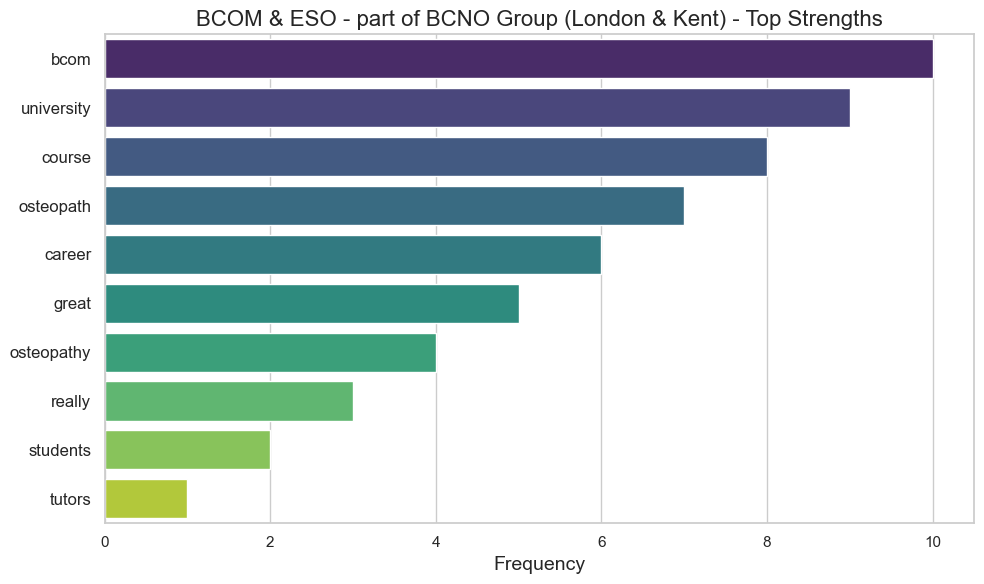

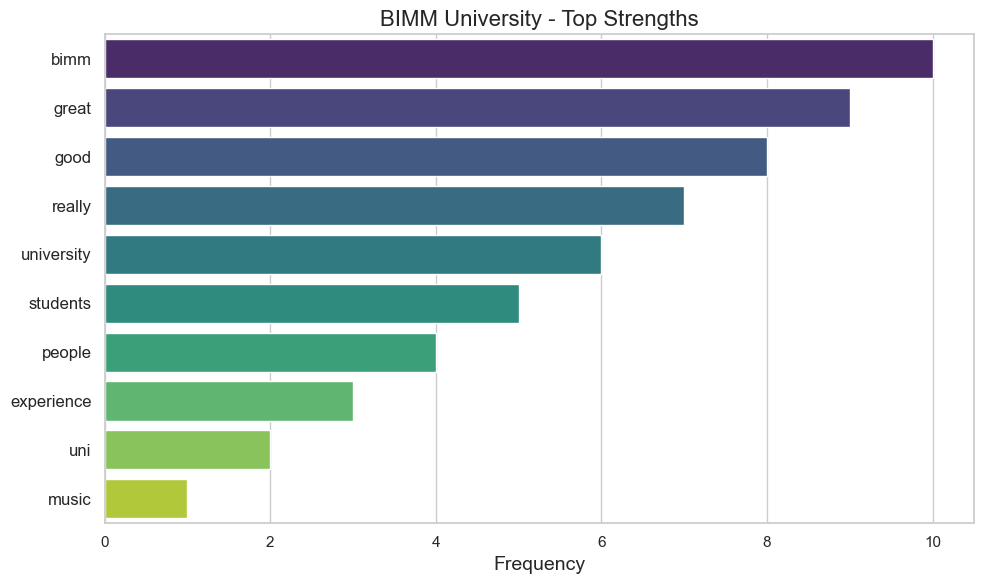

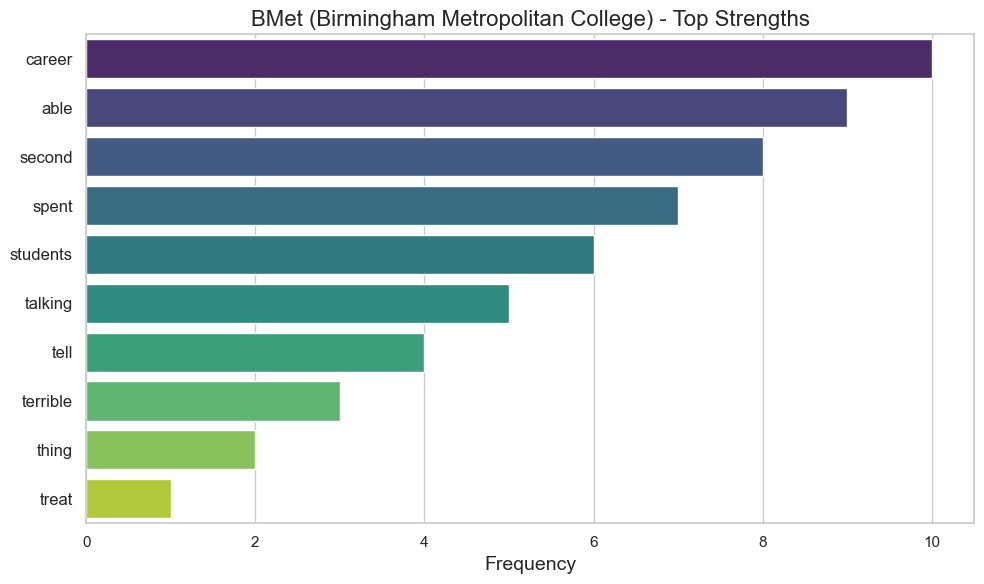

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Choose universities to visualize (or loop over all)
selected_unis = list(uni_strengths_weaknesses.keys())[10:20]  # Example: First 5 universities

for university in selected_unis:
    data = uni_strengths_weaknesses[university]
    
    # Skip if strengths are empty
    if not data['Strengths']:
        print(f"Skipping {university} due to lack of strengths data.")
        continue
    
    # Convert strengths into DataFrame for plotting
    strengths_df = pd.DataFrame(data['Strengths'], columns=['Term'])
    strengths_df['Frequency'] = range(len(strengths_df), 0, -1)

    # Plot strengths only
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Frequency', y='Term', data=strengths_df, palette="viridis"
    )
    plt.title(f"{university} - Top Strengths", fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("")
    plt.tick_params(axis='y', labelsize=12)  # Adjust y-axis label font size
    plt.tight_layout()
    plt.show()


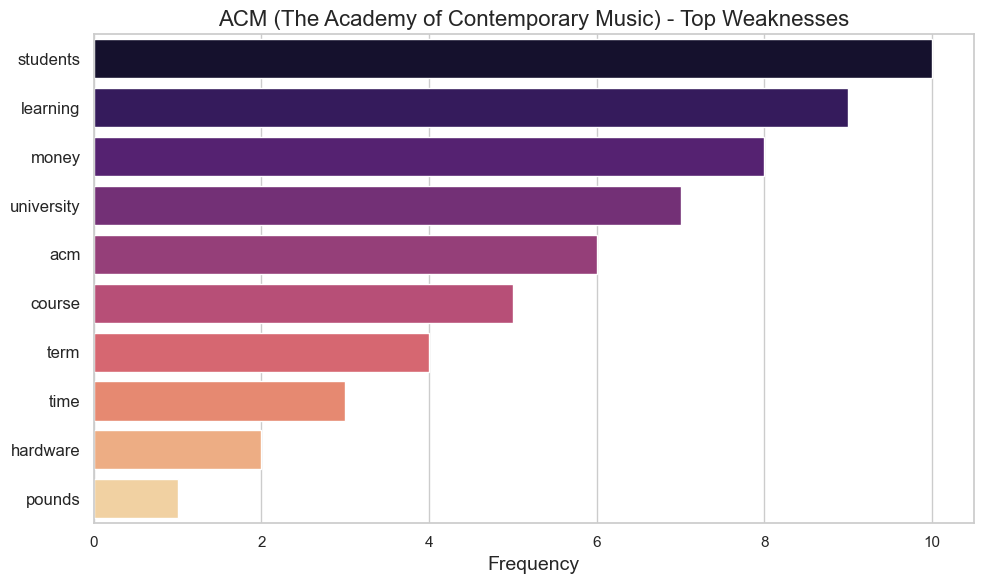

Skipping ARU London due to lack of weaknesses data.


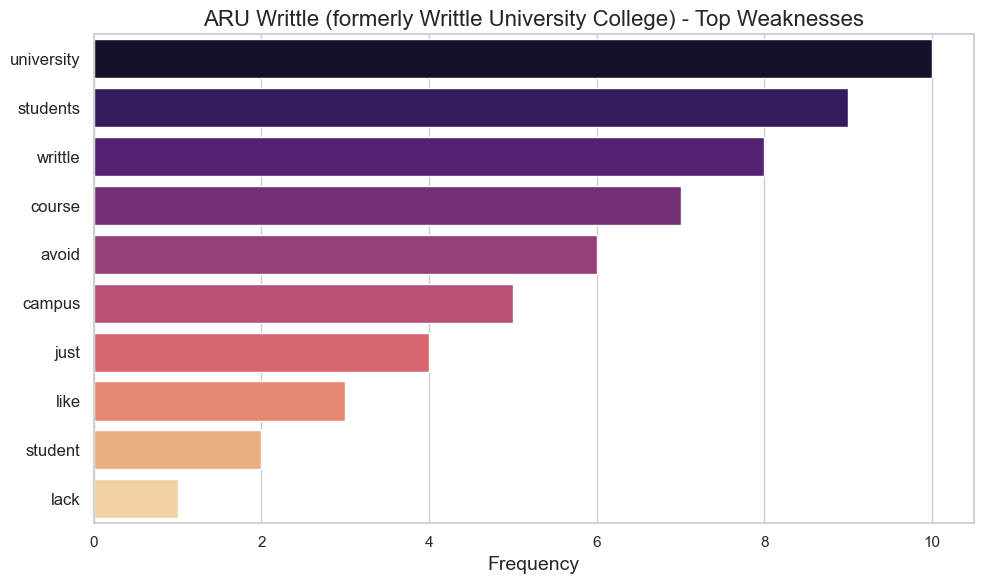

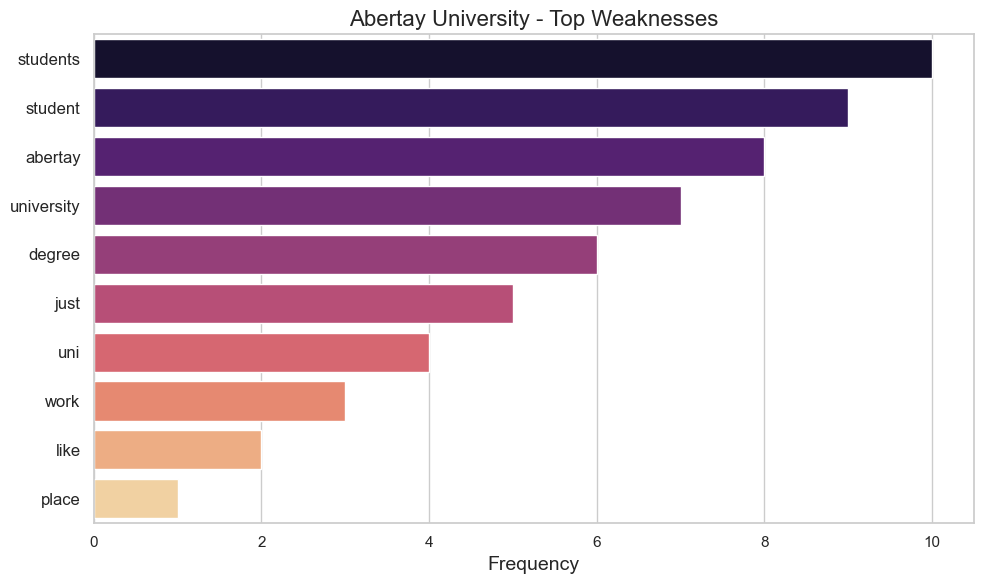

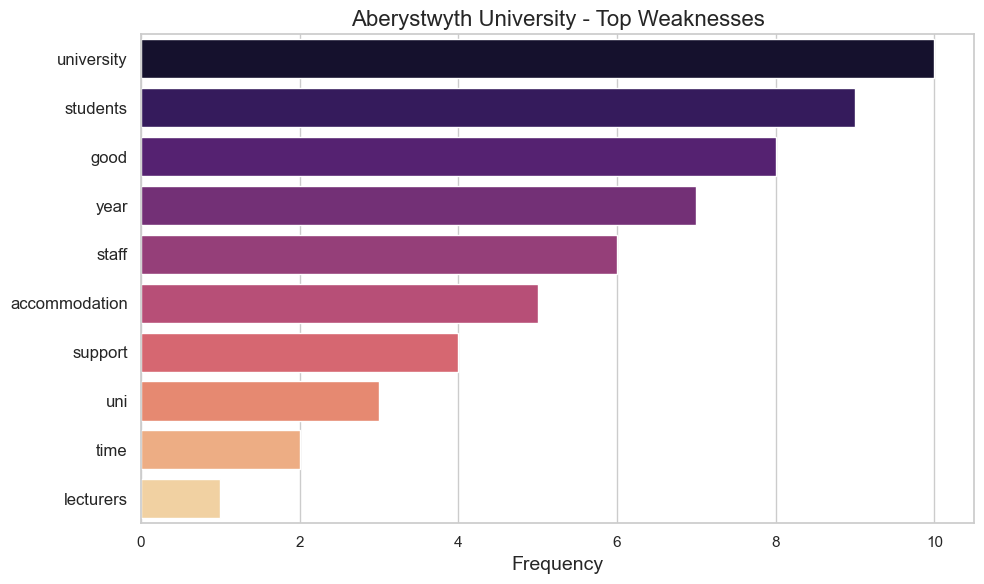

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Choose universities to visualize (or loop over all)
selected_unis = list(uni_strengths_weaknesses.keys())[:5]  # Example: First 5 universities

for university in selected_unis:
    data = uni_strengths_weaknesses[university]
    
    # Skip if weaknesses are empty
    if not data['Weaknesses']:
        print(f"Skipping {university} due to lack of weaknesses data.")
        continue
    
    # Convert weaknesses into DataFrame for plotting
    weaknesses_df = pd.DataFrame(data['Weaknesses'], columns=['Term'])
    weaknesses_df['Frequency'] = range(len(weaknesses_df), 0, -1)

    # Plot weaknesses only
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Frequency', y='Term', data=weaknesses_df, palette="magma"
    )
    plt.title(f"{university} - Top Weaknesses", fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("")
    plt.tick_params(axis='y', labelsize=12)  # Adjust y-axis label font size
    plt.tight_layout()
    plt.show()


# LDA

In [29]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')


ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (C:\Users\rohit\anaconda3\lib\site-packages\scipy\linalg\special_matrices.py)

In [33]:
# Drop rows where 'Review' is 'Undefined'
df = df[df['Review'] != 'undefined']


In [35]:
df = df.drop(columns=['Username', 'Course Name'])


In [37]:
df = df.drop(columns=['Sentiment','Sentiment_Category'])

In [42]:
# Check if any reviews are 'Undefined'
has_undefined_reviews = (df['City'] == 'Undefined').any()

print("Are there any 'Undefined' reviews?", has_undefined_reviews)


Are there any 'Undefined' reviews? False
